In [13]:
#Import modules
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

In [14]:
# Set the scenario
Typ = ["simple", "simple_I0", "meta"][1]
siz = ["10", "100", "1000"][:]
beta_controls = np.arange(0,110,10)

In [15]:
print(beta_controls)

[  0  10  20  30  40  50  60  70  80  90 100]


In [16]:
#get pickle
plot_dict = {}
ex_dict ={}
ex_dict["10"] = []
ex_dict["100"] = []
ex_dict["1000"] = []
for i in siz:
    with open(f"../../../../Data/R0_3/Sims_SIR/Pickles/Sim_dict_{Typ}_{i}c1.pickle", 'rb') as handle:
        out_dict = pickle.load(handle)
    plot_dict[f"Size_{i}"] = out_dict
    for j in range(len(beta_controls)):
        print(f" The Proportions of extinctions for N={i}:{sum(out_dict[f'Control={j}']['Extinction'])/1000}")
        ex_dict[f'{i}'].append(sum(out_dict[f'Control={j}']['Extinction'])/1000)


 The Proportions of extinctions for N=10:1.0
 The Proportions of extinctions for N=10:0.944
 The Proportions of extinctions for N=10:0.839
 The Proportions of extinctions for N=10:0.74
 The Proportions of extinctions for N=10:0.677
 The Proportions of extinctions for N=10:0.585
 The Proportions of extinctions for N=10:0.558
 The Proportions of extinctions for N=10:0.496
 The Proportions of extinctions for N=10:0.458
 The Proportions of extinctions for N=10:0.437
 The Proportions of extinctions for N=10:0.412
 The Proportions of extinctions for N=100:1.0
 The Proportions of extinctions for N=100:1.0
 The Proportions of extinctions for N=100:0.997
 The Proportions of extinctions for N=100:0.962
 The Proportions of extinctions for N=100:0.857
 The Proportions of extinctions for N=100:0.758
 The Proportions of extinctions for N=100:0.652
 The Proportions of extinctions for N=100:0.533
 The Proportions of extinctions for N=100:0.448
 The Proportions of extinctions for N=100:0.423
 The Propo

In [17]:
#fig, ax0 = plt.subplots()
#ax0.scatter(beta_controls,ex_dict["10"], color="b",label = "N=10", marker ="1",linewidths=3)
#ax0.scatter(beta_controls,ex_dict["100"], color="g",label = "N=100", marker ="2",linewidths=3)
#ax0.scatter(beta_controls,ex_dict["100"], color="r",label = "N=1000",marker="3",linewidths=3)
#ax0.set_xlabel("Beta Multiplier for Control")
#ax0.set_ylabel("Proportion of runs that result in extinction")
#ax0.legend()
#fig.show()

In [18]:
if Typ != "meta":
    df = pd.DataFrame(columns=["N","Final_size", "Tmax","Peak","Tpeak", "Control"])
    counter = 0
    vars = ["Final_size", "Tmax","Peak","Tpeak"]
    for k in siz:
        for j in range(len(beta_controls)):
            for i in range(len(plot_dict[f"Size_{k}"][f'Control={j}']['Extinction'])):
                for w in vars:
                    if w in ["Final_size", "Peak"]:
                        df.loc[counter,w] = (plot_dict[f"Size_{k}"][f"Control={j}"][w][i])/int(k)
                    else:
                         df.loc[counter,w] = (plot_dict[f"Size_{k}"][f"Control={j}"][w][i])

                df.loc[counter,"Control"] = f"{round(beta_controls[-j-1],2)}"
                df.loc[counter,"N"] = f"{k}"
                counter +=1
df["Control_int"] = df["Control"].astype(int)
df = df.set_index("Control_int")
df = df.sort_values(["Control_int"])
df.reset_index(inplace=True)

In [19]:
print(np.percentile(df.loc[np.where((df["N"] == "10") & (df["Control_int"] == 90))]["Final_size"],95))

0.3


C:\Users\ollie\anaconda3\envs\PLS Research\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ollie\anaconda3\envs\PLS Research\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ollie\anaconda3\envs\PLS Research\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ollie\anaconda3\envs\PLS Research\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

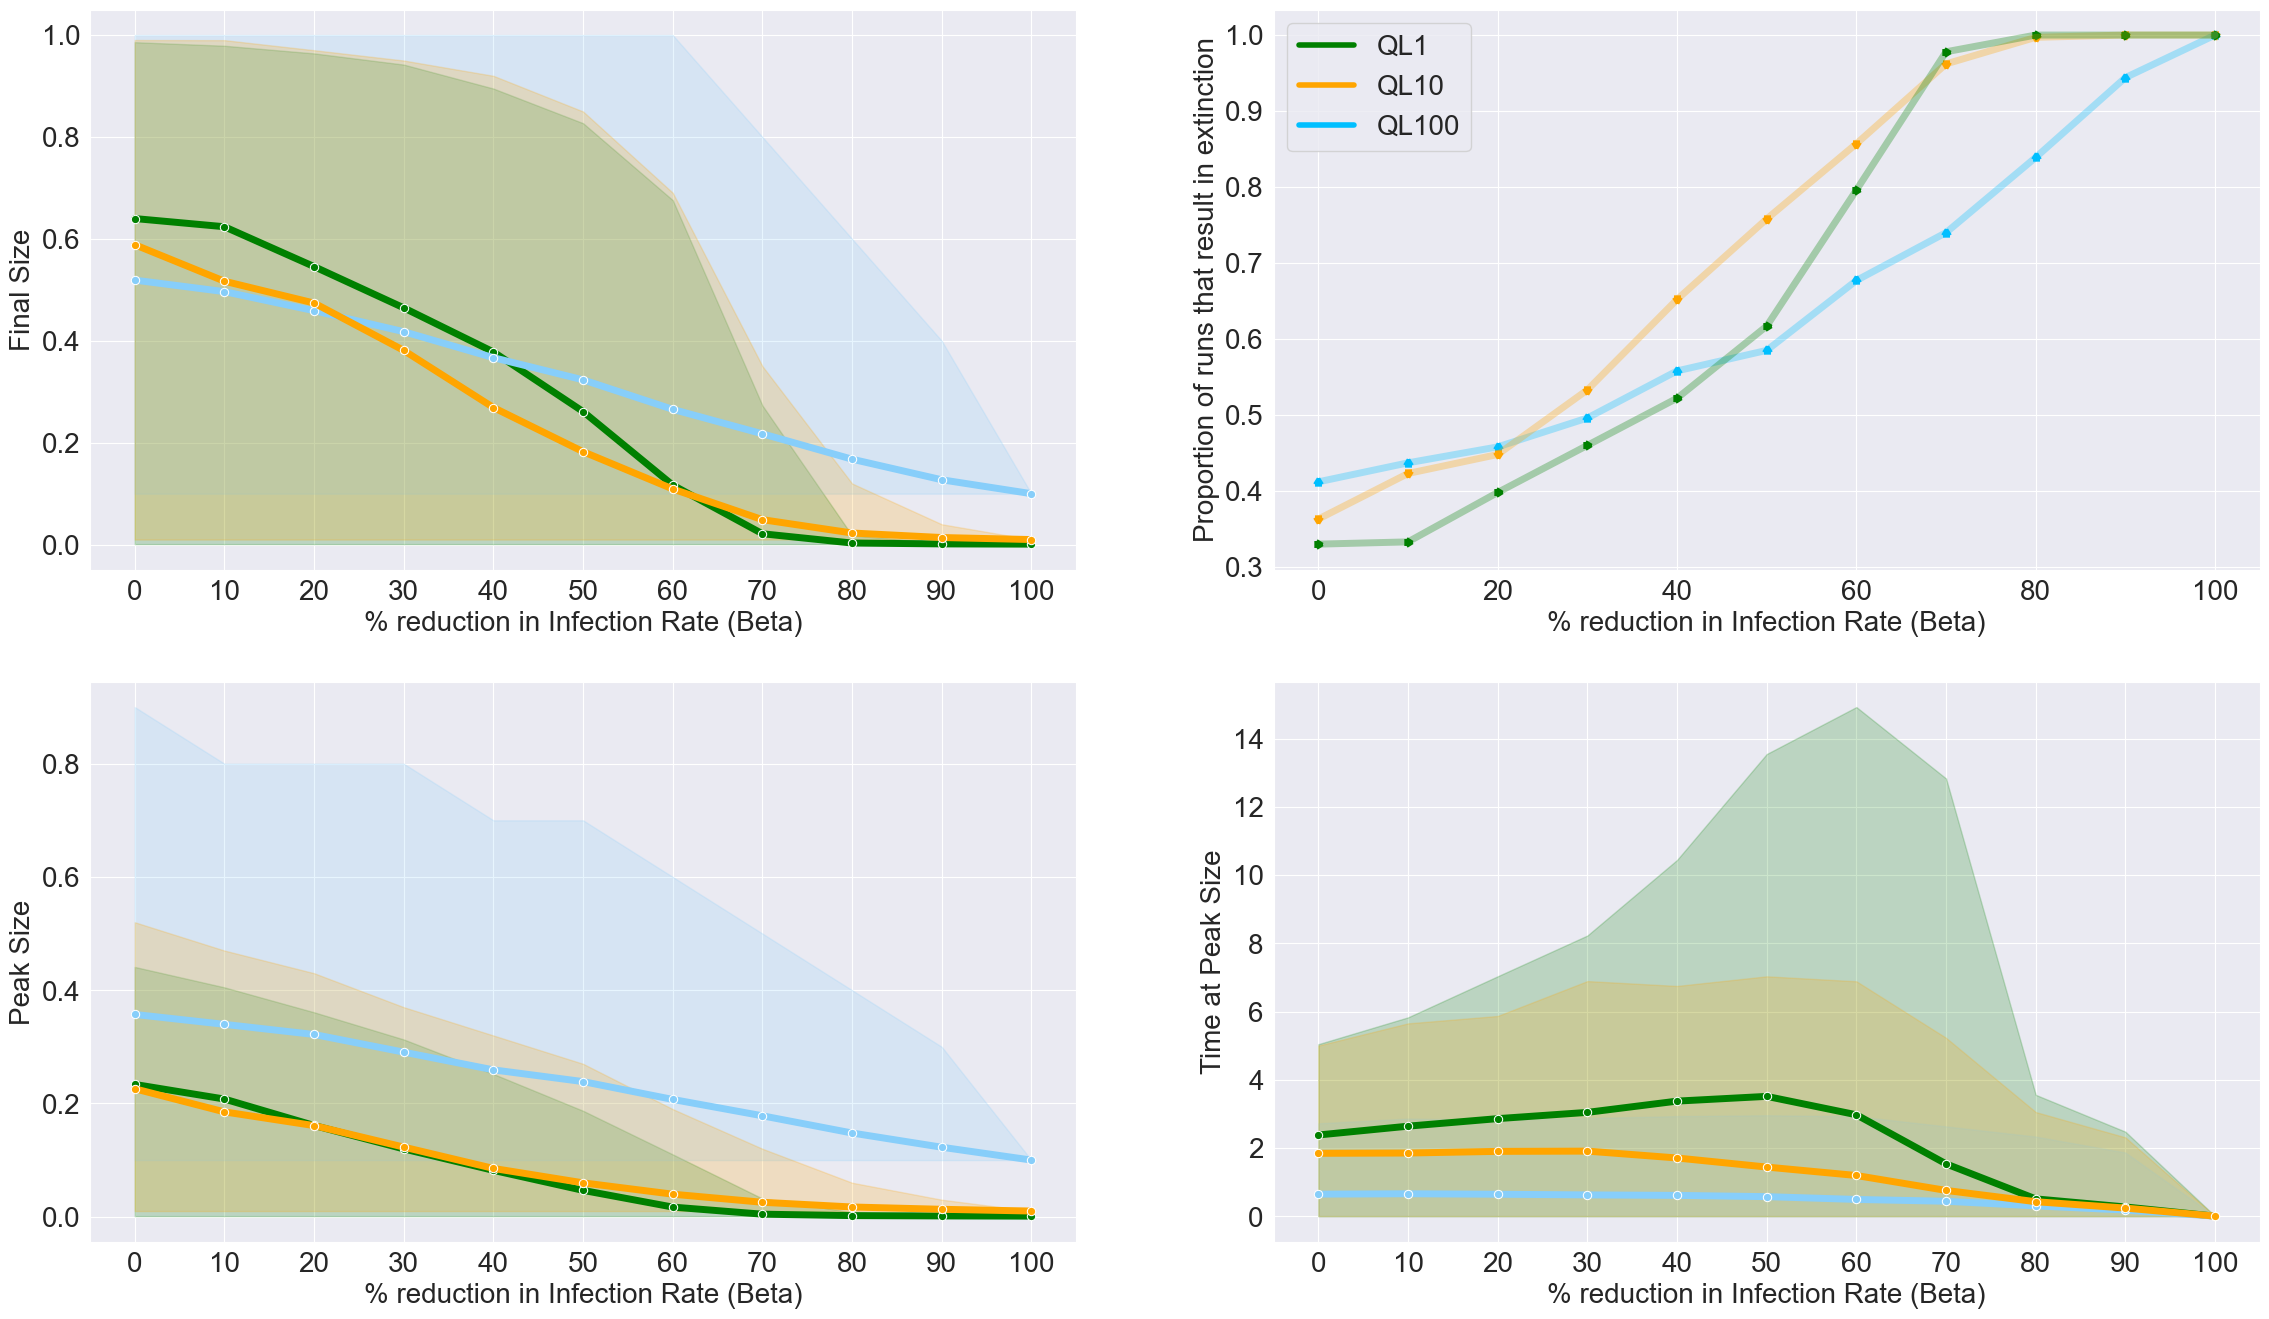

In [20]:
if Typ != "meta":
    fig, ax0 = plt.subplots(figsize = (28,16), nrows=2,ncols=2)
    #sns.set_context('paper', font_scale=2.4)
    # creating a dictionary
    font = {'size': 20}
    # using rc function
    plt.rc('font', **font)
    ax0 = ax0.flatten()
    vars = ["Final_size", "Extinction","Peak","Tpeak"]
    counter = 0
    palette = ['green', 'lightskyblue', 'orange']

    for w in vars:
        if counter == 0:
            sns.lineplot(data=df, x = "Control", y = w, hue = "N", ax =ax0[counter],errorbar=("pi",95),err_style = "band",legend=True,marker="o",palette=palette,linewidth=5)
            ax0[0].get_legend().remove()
            ax0[counter].set_xlabel("% reduction in Infection Rate (Beta)")
            ax0[counter].set_ylabel("Final Size")
        elif w=="Extinction":
            ax0[counter].scatter(beta_controls[::-1],ex_dict["10"],label = "QL100", marker ="1",linewidths=5, color = "deepskyblue")
            ax0[counter].scatter(beta_controls[::-1],ex_dict["100"],label = "QL10", marker ="2",linewidths=5, color = "orange")
            ax0[counter].scatter(beta_controls[::-1],ex_dict["1000"],label = "QL1",marker="3",linewidths=5, color = "green")
            ax0[counter].plot(beta_controls[::-1],ex_dict["10"],label = "QL100", alpha = 0.3, color = "deepskyblue",linewidth=5)
            ax0[counter].plot(beta_controls[::-1],ex_dict["100"],label = "QL10",alpha=0.3, color = "orange",linewidth=5)
            ax0[counter].plot(beta_controls[::-1],ex_dict["1000"],label = "QL1",alpha=0.3, color = "green",linewidth=5)
            ax0[counter].set_xlabel("% reduction in Infection Rate (Beta)")
            ax0[counter].set_ylabel("Proportion of runs that result in extinction")
        else:
            sns.lineplot(data=df, x = "Control", y = w, hue = "N", ax =ax0[counter],errorbar=("pi",95),err_style = "band",marker="o",palette=palette,linewidth=5)

            ax0[counter].get_legend().remove()
            ax0[counter].set_xlabel("% reduction in Infection Rate (Beta)")
            ax0[counter].set_ylabel(f"{['Peak Size', 'Time at Peak Size'][counter-2]}")
        counter +=1
    legend_elements = [Line2D([0], [0], color='g', lw=4, label='QL1'),
                   Line2D([0], [0], color='orange',lw=4, label='QL10'),
                       Line2D([0], [0], color='deepskyblue', lw=4, label='QL100')]
    ax0[1].legend(handles=legend_elements)
    fig.show()

In [21]:
if Typ == "!meta":
    df = pd.DataFrame(columns=["N","Node","Final_size","Peak","Tpeak", "Control"])
    counter = 0
    vars = ["Final_size","Peak","Tpeak"]
    nodes = np.arange(1,5,1)
    for k in siz:
        for j in range(len(beta_controls)):
            for i in range(0,1000):
                for n in nodes:
                    for w in vars:
                        if w in ["Final_size", "Peak"]:
                            df.loc[counter,w] = (plot_dict[f"Size_{k}"][f"Control={j}"][w][f"Node{n}"][i])/int(k)
                        else:
                             df.loc[counter,w] = (plot_dict[f"Size_{k}"][f"Control={j}"][w][f"Node{n}"][i])

                    df.loc[counter,"Control"] = f"{round(beta_controls[j],2)}"
                    df.loc[counter,"N"] = f"{k}"
                    df.loc[counter,"Node"] = f"{n}"
                    counter +=1
print(df)

       Control_int     N Final_size       Tmax   Peak     Tpeak Control
0                0  1000      0.915  10.492685  0.307   3.44285       0
1                0    10        0.9   3.899805    0.6  0.429634       0
2                0    10        0.8   3.837703    0.4  0.655034       0
3                0    10        0.1   0.040324    0.1       0.0       0
4                0    10        1.0    2.40526    0.9   0.75954       0
...            ...   ...        ...        ...    ...       ...     ...
32995          100  1000      0.001   0.018937  0.001       0.0     100
32996          100  1000      0.001   0.522266  0.001       0.0     100
32997          100  1000      0.001   0.660688  0.001       0.0     100
32998          100  1000      0.001   1.183115  0.001       0.0     100
32999          100    10        0.1   2.395189    0.1       0.0     100

[33000 rows x 7 columns]


In [22]:
if Typ == "!meta":
    dfT = pd.DataFrame(columns=["N", "Tmax","Control"])
    counter = 0
    vars = ["Tmax"]
    for k in siz:
        for j in range(len(beta_controls)):
            for i in range(0,1000):
                for w in vars:
                    dfT.loc[counter,w] = (plot_dict[f"Size_{k}"][f"Control={j}"][w][i])

                dfT.loc[counter,"Control"] = f"{round(beta_controls[j],2)}"
                dfT.loc[counter,"N"] = f"{k}"
                counter +=1
    print(dfT)

In [23]:
if Typ == "meta":
    fig, ax0 = plt.subplots(figsize = (28,16), nrows=2,ncols=2)
    #sns.set_context('paper', font_scale=2.4)
    # creating a dictionary
    font = {'size': 20}
    # using rc function
    plt.rc('font', **font)
    ax0 = ax0.flatten()
    vars = ["Final_size", "Extinction","Peak","Tpeak"]
    df = pd.read_csv("METABETA.csv")
    df.drop(df.columns[[0]], axis=1, inplace=True)
    print(df)
    df['N'] = df['N'].astype(str)
    counter = 0
    for w in vars:
        if counter == 0:

            sns.lineplot(data=df, x = "Control", y = w, hue = "N", ax =ax0[counter],errorbar=("pi",95),err_style = "band",marker="o",legend=True)
            ax0[counter].set_xlabel("Beta Multiplier for Control")
            ax0[counter].set_ylabel("Final Size")
        elif w=="Extinction":
            ax0[counter].scatter(beta_controls,ex_dict["10"],label = "N=10", marker ="1",linewidths=3)
            ax0[counter].scatter(beta_controls,ex_dict["100"],label = "N=100", marker ="2",linewidths=3)
            ax0[counter].scatter(beta_controls,ex_dict["100"],label = "N=1000",marker="3",linewidths=3)
            ax0[counter].plot(beta_controls,ex_dict["10"],label = "N=10", alpha = 0.3)
            ax0[counter].plot(beta_controls,ex_dict["100"],label = "N=100",alpha=0.3)
            ax0[counter].plot(beta_controls,ex_dict["100"],label = "N=1000",alpha=0.3,linestyle = "--")
            ax0[counter].set_xlabel("Beta Multiplier for Control")
            ax0[counter].set_ylabel("Proportion of runs that result in extinction")
        else:
            sns.lineplot(data=df, x = "Control", y = w, hue = "N", ax =ax0[counter],errorbar=("pi",95),err_style = "band",marker="o")
            ax0[counter].get_legend().remove()
            ax0[counter].set_xlabel("Beta Multiplier for Control")
            ax0[counter].set_ylabel(f"{['Peak Size', 'Time at Peak Size'][counter-2]}")
        counter +=1
    fig.show()